In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data = pd.read_csv('/content/drive/MyDrive/magister_Python/portrait_2022.csv')

In [22]:
data.head()

,Timestamp,Ви працюєте зараз в ІТ?,Work status,Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?,Де ви мешкали до початку повномасштабної війни?,Стовпець1,Де живуть зараз - області,Де живуть зараз - країни,Чи переїжджали ви через початок війни?,Ви зараз живете...,...,Ваша настільна операційна система для роботи,Які використовуєте сервіси та інструменти для спільної роботи?,Яка у вас освіта?,Знання англійської мови,Чи приділяєте час самонавчанню?,Ваша стать,Ваш вік,Ваш сімейний стан,Чи є у вас діти?,Які почуття ви найчастіше відчували протягом останнього тижня?
0,5.30.2022 10:19:35,"Так, працюю full-time",Працюють в Україні,Втратив (ла) роботу через початок війни,Київ,Київ чи область,Львів чи область,Україна,"Так, переїхав(ла) в інше місце в Україні","У великому місті (столиця, обласний / регіонал...",...,MacOS,"GitLab, Jira, Slack, Trello","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,"Ні, у мене немає на це часу",Чоловік,27,Одружений/одружена,Так,"Розпач, Сум, Втому, Надію"
1,5.30.2022 10:19:55,"Так, працюю full-time",Працюють в Україні,Ніяких або майже ніяких,Дніпро,Дніпро чи область,Дніпро чи область,Україна,Ні,"У великому місті (столиця, обласний / регіонал...",...,MacOS,"Confluence, Jira, Microsoft Teams, Slack",1. Середня,Upper-Intermediate,Регулярно відвідую профільні ІТ-події (конфере...,Чоловік,23,Маю стосунки,Ні,"Тривогу, Спокій, Оптимізм, Втому"
2,5.30.2022 10:22:01,"Так, працюю full-time",Працюють в Україні,Зменшилася кількість роботи / проєктів,Харків,Харків чи область,Харків чи область,Україна,Ні,"У великому місті (столиця, обласний / регіонал...",...,MacOS,"GitHub, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Pre-Intermediate,Регулярно відвідую профільні ІТ-події (конфере...,Чоловік,28,Одружений/одружена,Ні,Оптимізм
3,5.30.2022 10:22:25,"Так, працюю full-time",Працюють в Україні,Зменшилася кількість роботи / проєктів,Харків,Харків чи область,Київ чи область,Україна,"Так, переїхав(ла) в інше місце в Україні","У великому місті (столиця, обласний / регіонал...",...,Linux,"Confluence, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Intermediate,Читаю професійну літературу,Чоловік,22,Вільний(-а),Ні,"Радість, Вину, Тривогу"
4,5.30.2022 10:22:30,"Так, працюю full-time",Працюють в Україні,Збільшилася кількість роботи / проєктів,Київ,Київ чи область,Хмельницький чи область,Україна,"Так, переїхав(ла) в інше місце в Україні",У сільській місцевості,...,MacOS,"Confluence, Google Suite (Docs, Meet, etc), Ji...","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,Проходжу онлайн-курси/тренінги,Чоловік,30,Співжиття (фактичний шлюб),Ні,"Втому, Радість, Тривогу, Впевненість, Надію, О..."


In [23]:
df = pd.DataFrame(data)

# Extract only the date part of the 'Timestamp' column, considering the year 2022
df['Timestamp'] = df['Timestamp'].apply(lambda x: x.split(' ')[0])  # Split by space and keep the first part

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m.%d.%Y')

# Define the cutoff date (February 24th) as a datetime object
cutoff_date = pd.to_datetime('2022-02-24')

# Filter rows before and after the cutoff date
rows_before_cutoff = df[df['Timestamp'] < cutoff_date]
rows_after_cutoff = df[df['Timestamp'] >= cutoff_date]

# Get the number of rows before and after the cutoff date
num_rows_before_cutoff = len(rows_before_cutoff)
num_rows_after_cutoff = len(rows_after_cutoff)

print(f'Number of rows before February 24th: {num_rows_before_cutoff}')
print(f'Number of rows after February 24th: {num_rows_after_cutoff}')

Number of rows before February 24th: 0
Number of rows after February 24th: 15135


Отже, не маючи даних 2022-го року до початку повномасштабної війни, дослідимо загальний характер даних без порівняння

In [25]:
df.head()

,Timestamp,Ви працюєте зараз в ІТ?,Work status,Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?,Де ви мешкали до початку повномасштабної війни?,Стовпець1,Де живуть зараз - області,Де живуть зараз - країни,Чи переїжджали ви через початок війни?,Ви зараз живете...,...,Ваша настільна операційна система для роботи,Які використовуєте сервіси та інструменти для спільної роботи?,Яка у вас освіта?,Знання англійської мови,Чи приділяєте час самонавчанню?,Ваша стать,Ваш вік,Ваш сімейний стан,Чи є у вас діти?,Які почуття ви найчастіше відчували протягом останнього тижня?
0,2022-05-30,"Так, працюю full-time",Працюють в Україні,Втратив (ла) роботу через початок війни,Київ,Київ чи область,Львів чи область,Україна,"Так, переїхав(ла) в інше місце в Україні","У великому місті (столиця, обласний / регіонал...",...,MacOS,"GitLab, Jira, Slack, Trello","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,"Ні, у мене немає на це часу",Чоловік,27,Одружений/одружена,Так,"Розпач, Сум, Втому, Надію"
1,2022-05-30,"Так, працюю full-time",Працюють в Україні,Ніяких або майже ніяких,Дніпро,Дніпро чи область,Дніпро чи область,Україна,Ні,"У великому місті (столиця, обласний / регіонал...",...,MacOS,"Confluence, Jira, Microsoft Teams, Slack",1. Середня,Upper-Intermediate,Регулярно відвідую профільні ІТ-події (конфере...,Чоловік,23,Маю стосунки,Ні,"Тривогу, Спокій, Оптимізм, Втому"
2,2022-05-30,"Так, працюю full-time",Працюють в Україні,Зменшилася кількість роботи / проєктів,Харків,Харків чи область,Харків чи область,Україна,Ні,"У великому місті (столиця, обласний / регіонал...",...,MacOS,"GitHub, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Pre-Intermediate,Регулярно відвідую профільні ІТ-події (конфере...,Чоловік,28,Одружений/одружена,Ні,Оптимізм
3,2022-05-30,"Так, працюю full-time",Працюють в Україні,Зменшилася кількість роботи / проєктів,Харків,Харків чи область,Київ чи область,Україна,"Так, переїхав(ла) в інше місце в Україні","У великому місті (столиця, обласний / регіонал...",...,Linux,"Confluence, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Intermediate,Читаю професійну літературу,Чоловік,22,Вільний(-а),Ні,"Радість, Вину, Тривогу"
4,2022-05-30,"Так, працюю full-time",Працюють в Україні,Збільшилася кількість роботи / проєктів,Київ,Київ чи область,Хмельницький чи область,Україна,"Так, переїхав(ла) в інше місце в Україні",У сільській місцевості,...,MacOS,"Confluence, Google Suite (Docs, Meet, etc), Ji...","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,Проходжу онлайн-курси/тренінги,Чоловік,30,Співжиття (фактичний шлюб),Ні,"Втому, Радість, Тривогу, Впевненість, Надію, О..."


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15135 entries, 0 to 15134
Data columns (total 61 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                            --------------  -----         
 0   Timestamp                                                                                                                                                         15135 non-null  datetime64[ns]
 1   Ви працюєте зараз в ІТ?                                                                                                                                           15135 non-null  object        
 2   Work status                                                                                   

Відповідь на перше питання:

Щоб дізнатись, як змінилось життя айтівців після повномасштабного вторгнення,  потрібно дослідити ті показники, що відповідають на запитання про зміни, пов'язані з війною
Такими факторами є стовпці:

Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?

Де ви мешкали до початку повномасштабної війни?

Чи переїжджали ви через початок війни?

В який регіон України ви переїхали через війну?

Чи плануєте ви повернутися?

В яку країну ви переїхали?

Чи змінилася ваша зарплата через початок війни?

Багато ІТ-спеціалістів зараз підтримують фінансово українську армію та волонтерів. Чи можете ви оцінити, який % ваших щомісячих доходів іде на такі ініціативи?

Як змінилась ваша продуктивність після початку повносмаштабної війни?  

Які почуття ви найчастіше відчували протягом останнього тижня?


In [30]:
# Define a list of column indices to include in the "first_question" dataset
column_indices = [3, 4, 8, 11, 12, 13, 38, 41, 49, 60]

# Create the "first_question" dataset by selecting columns using column indices
first_question = df.iloc[:, column_indices]

# Print the first few rows of the "first_question" dataset
first_question.head()

,Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?,Де ви мешкали до початку повномасштабної війни?,Чи переїжджали ви через початок війни?,В який регіон України ви переїхали через війну?,Чи плануєте ви повернутися?,В яку країну ви переїхали?,Чи змінилася ваша зарплата через початок війни?,"Багато ІТ-спеціалістів зараз підтримують фінансово українську армію та волонтерів. Чи можете ви оцінити, який % ваших щомісячих доходів іде на такі ініціативи?",Як змінилась ваша продуктивність після початку повносмаштабної війни?,Які почуття ви найчастіше відчували протягом останнього тижня?
0,Втратив (ла) роботу через початок війни,Київ,"Так, переїхав(ла) в інше місце в Україні",Львів чи область,"Так, найближчим часом",NaN,Зарплату взагалі не виплачують / втратив(-ла) ...,1,1. Сильно знизилася - працюю набагато менш про...,"Розпач, Сум, Втому, Надію"
1,Ніяких або майже ніяких,Дніпро,Ні,NaN,NaN,NaN,"Зарплата збільшилася, був перегляд / нова робота",0,2. Дещо знизилася - працюю дещо менш продуктив...,"Тривогу, Спокій, Оптимізм, Втому"
2,Зменшилася кількість роботи / проєктів,Харків,Ні,NaN,NaN,NaN,Зарплата не змінилася,5,3. Практично не змінилася,Оптимізм
3,Зменшилася кількість роботи / проєктів,Харків,"Так, переїхав(ла) в інше місце в Україні",Київ чи область,"Ні, не планую повертатися",NaN,Зарплата збільшилася через послаблення гривні,0,3. Практично не змінилася,"Радість, Вину, Тривогу"
4,Збільшилася кількість роботи / проєктів,Київ,"Так, переїхав(ла) в інше місце в Україні",Хмельницький чи область,"Так, коли в моєму регіоні стане безпечно",NaN,Зарплата зменшилася більше ніж на 25%,50,2. Дещо знизилася - працюю дещо менш продуктив...,"Втому, Радість, Тривогу, Впевненість, Надію, О..."


Для вивдення найбільш частих відповідей (на 1-ше питання про те, як змінилось життя Українських айтівців), згрупуємо відповіді по стовпцям. Виведемо топ 5 відповідей айтівців:

In [33]:
# Loop through the columns and print the top 5 values with the most counts for each one
for column in first_question.columns:
    print(f"Column: {column}")
    value_counts = first_question[column].value_counts()
    top_5_values = value_counts.nlargest(5)
    print(top_5_values)
    print("\n")


Column: Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?
Ніяких або майже ніяких                                                               11230
Зменшилася кількість роботи / проєктів                                                 1881
Збільшилася кількість роботи / проєктів                                                1226
Втратив (ла) роботу через початок війни                                                 680
Був (ла) мобілізований (на) чи пішов добровольцем в ЗСУ, ТрО, став (ла) волонтером      106
Name: Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?, dtype: int64


Column: Де ви мешкали до початку повномасштабної війни?
Київ      6343
Львів     2267
Харків    1868
Дніпро     838
Одеса      687
Name: Де ви мешкали до початку повномасштабної війни?, dtype: int64


Column: Чи переїжджали ви через початок війни?
Ні                                                   5434
Так, переїхав(ла) в інше місце в Україні      

Отже, війна для більшості айтівців жодним чином не вплинула на роботу. Більшість з них також не переїжджала зі свого міста. З тих, хто переїжджав, найбільше їхали у Львів чи область і планують повернутися, коли стане безпечніше. Серед тих, хто поїхав за кордон, найбільше виїхало у Польшу. Зарплати після початку повномасштабного вторгнення в айтівців найчастіше не змінювались. Це допомагає їх регулярно донатити близько 10% від доходу на армію. Продуктивність айтівців дещо знизилась після початку вторгнення і найчастіше відчуття в айтівців - це втома

Відповідь на друге питання:

In [39]:
second_question = df.iloc[:, [1, 2, 6, 7, 16, 17, 18, 40, 47, 53, 54, 56, 57, 58, 59]]

In [40]:
second_question.head()

,Ви працюєте зараз в ІТ?,Work status,Де живуть зараз - області,Де живуть зараз - країни,Оберіть вашу посаду,Ваш тайтл,Вкажіть вашу спеціалізацію,Яке ваше фінансове становище?,Чи плануєте змінити роботу цього року?,Яка у вас освіта?,Знання англійської мови,Ваша стать,Ваш вік,Ваш сімейний стан,Чи є у вас діти?
0,"Так, працюю full-time",Працюють в Україні,Львів чи область,Україна,"Software Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,"Нульове, витрачаю стільки, скільки заробляю",1. Так,"5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,Чоловік,27,Одружений/одружена,Так
1,"Так, працюю full-time",Працюють в Україні,Дніпро чи область,Україна,"Designer (Graphic, UX/UI, Game, Artist, etc.)",Senior,NaN,"Позитивне, витрачаю менше, ніж заробляю",2. Ні,1. Середня,Upper-Intermediate,Чоловік,23,Маю стосунки,Ні
2,"Так, працюю full-time",Працюють в Україні,Харків чи область,Україна,HTML Coder,Junior,NaN,"Позитивне, витрачаю менше, ніж заробляю",2. Ні,"5. Вища (бакалавр, спеціаліст, магістр)",Pre-Intermediate,Чоловік,28,Одружений/одружена,Ні
3,"Так, працюю full-time",Працюють в Україні,Київ чи область,Україна,"Software Engineer (Junior, Middle, Senior, Tea...",Junior,NaN,"Позитивне, витрачаю менше, ніж заробляю",3. Ще не визначився,"5. Вища (бакалавр, спеціаліст, магістр)",Intermediate,Чоловік,22,Вільний(-а),Ні
4,"Так, працюю full-time",Працюють в Україні,Хмельницький чи область,Україна,"Project/Product/Program Manager, Product Owner...",Head,NaN,"Позитивне, витрачаю менше, ніж заробляю",2. Ні,"5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,Чоловік,30,Співжиття (фактичний шлюб),Ні


Щоб дізнатись портрет айті спеціаліста 2022 року дізнаємось моду по кожній колонці.

In [41]:
for column in second_question.columns:
    most_frequent_value = second_question[column].mode().values[0]
    print(f"Column: {column}, Most Frequent Value: {most_frequent_value}")

Column: Ви працюєте зараз в ІТ?, Most Frequent Value: Так, працюю full-time
Column: Work status, Most Frequent Value: Працюють в Україні
Column: Де живуть зараз - області, Most Frequent Value: Київ чи область
Column: Де живуть зараз - країни, Most Frequent Value: Україна
Column: Оберіть вашу посаду, Most Frequent Value: Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)
Column: Ваш тайтл, Most Frequent Value: Middle
Column: Вкажіть вашу спеціалізацію, Most Frequent Value: Manual QA
Column: Яке ваше фінансове становище?, Most Frequent Value: Позитивне, витрачаю менше, ніж заробляю
Column: Чи плануєте змінити роботу цього року?, Most Frequent Value: 2. Ні
Column: Яка у вас освіта?, Most Frequent Value: 5. Вища (бакалавр, спеціаліст, магістр)
Column: Знання англійської мови, Most Frequent Value: Upper-Intermediate
Column: Ваша стать, Most Frequent Value: Чоловік
Column: Ваш вік, Most Frequent Value: 25
Column: Ваш сімейний стан, Most Frequent Value: Одружений/одружена
C

Отже, типовий айтівець:
Це одружений чоловік 25 років, без дітей, з вищою освітою, проживає в Україні, в Києві. Працює Middle Manual QA або Software Engineer. Знає англійську вище середнього, та заробляє більше ніж витрачає. Не планує змінювати роботу

Відповідь на третє питання:

In [64]:
third_question = df.iloc[:, [37, 38, 39, 40, 41, 50]]
third_question.rename(columns={third_question.columns[4]: 'Donations to Ukrainian Initiatives Percentage',third_question.columns[2]: 'Do you have other sources of income'}, inplace=True)

third_question.head()



<ipython-input-64-2e07c1730fe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_question.rename(columns={third_question.columns[4]: 'Donations to Ukrainian Initiatives Percentage',third_question.columns[2]: 'Do you have other sources of income'}, inplace=True)


,Чи задоволені ви зарплатою?,Чи змінилася ваша зарплата через початок війни?,Do you have other sources of income,Яке ваше фінансове становище?,Donations to Ukrainian Initiatives Percentage,Чи оплачує компанія овертайми?
0,"Швидше задоволений(-а), ніж ні",Зарплату взагалі не виплачують / втратив(-ла) ...,Ні,"Нульове, витрачаю стільки, скільки заробляю",1,4. Не овертаймимо
1,"Швидше задоволений(-а), ніж ні","Зарплата збільшилася, був перегляд / нова робота",Ні,"Позитивне, витрачаю менше, ніж заробляю",0,1. Так
2,"Так, задоволений(-а)",Зарплата не змінилася,Ні,"Позитивне, витрачаю менше, ніж заробляю",5,1. Так
3,"Швидше задоволений(-а), ніж ні",Зарплата збільшилася через послаблення гривні,Ні,"Позитивне, витрачаю менше, ніж заробляю",0,2. Частково
4,"Так, задоволений(-а)",Зарплата зменшилася більше ніж на 25%,Ні,"Позитивне, витрачаю менше, ніж заробляю",50,4. Не овертаймимо


Подивимось на рівень задоволення айтівців своїм доходом:

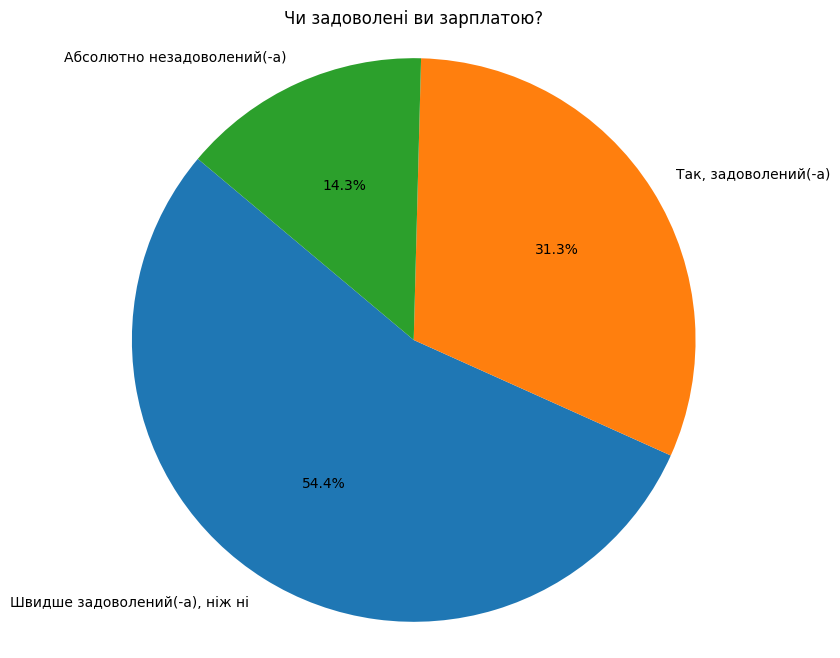

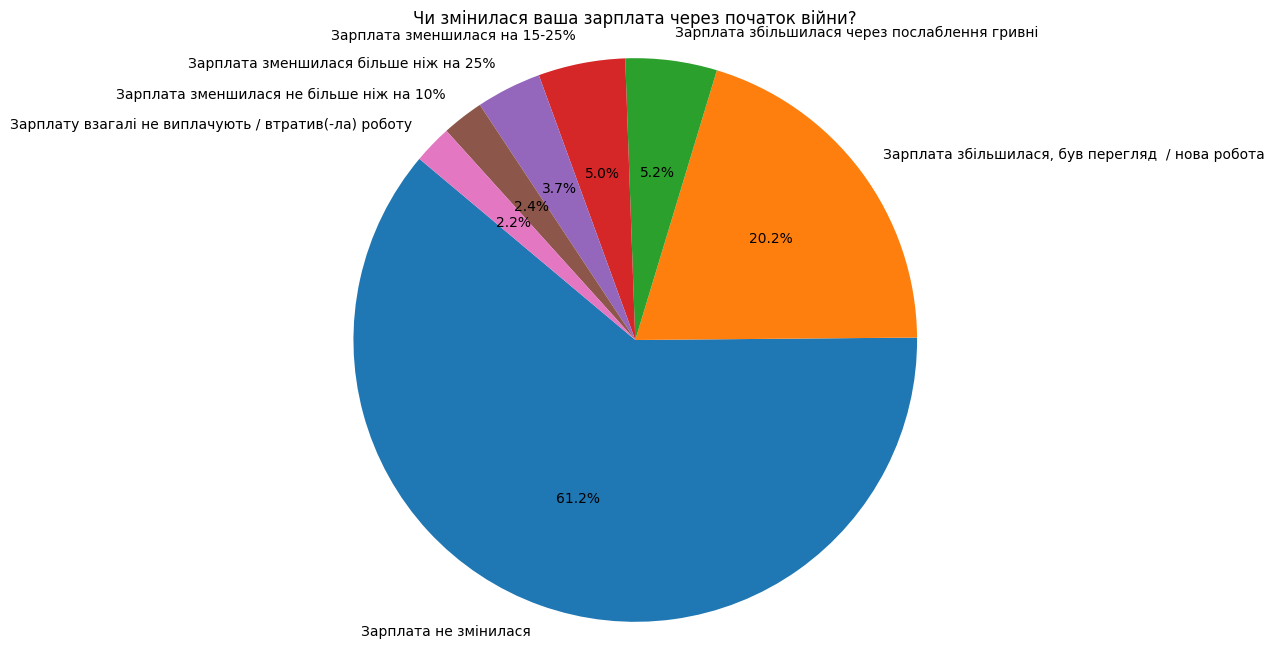

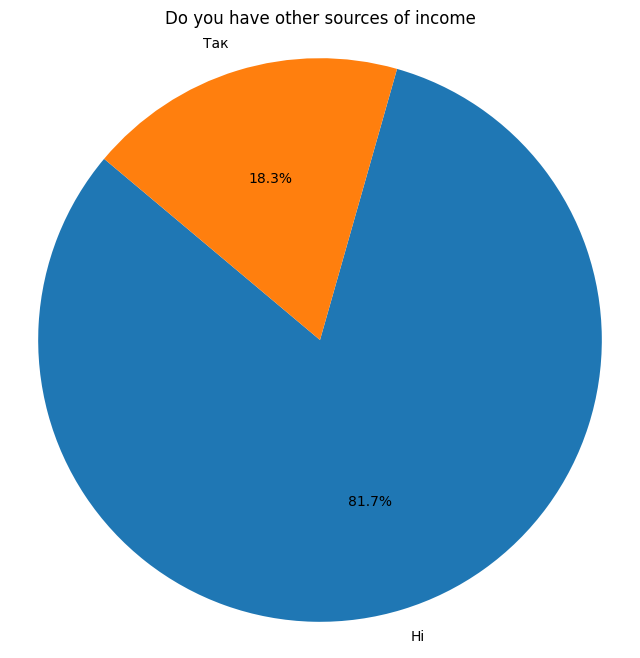

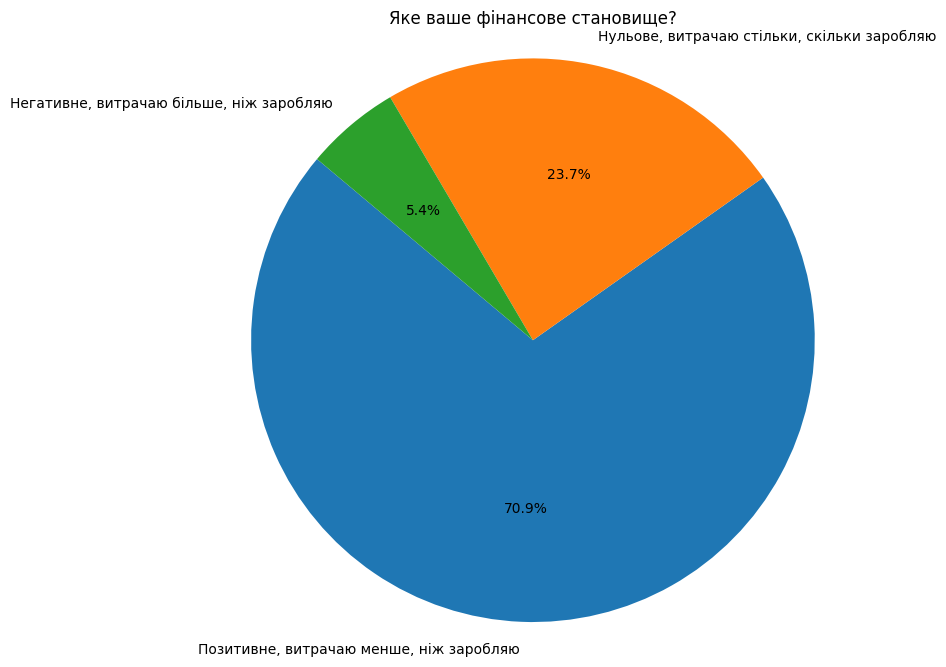

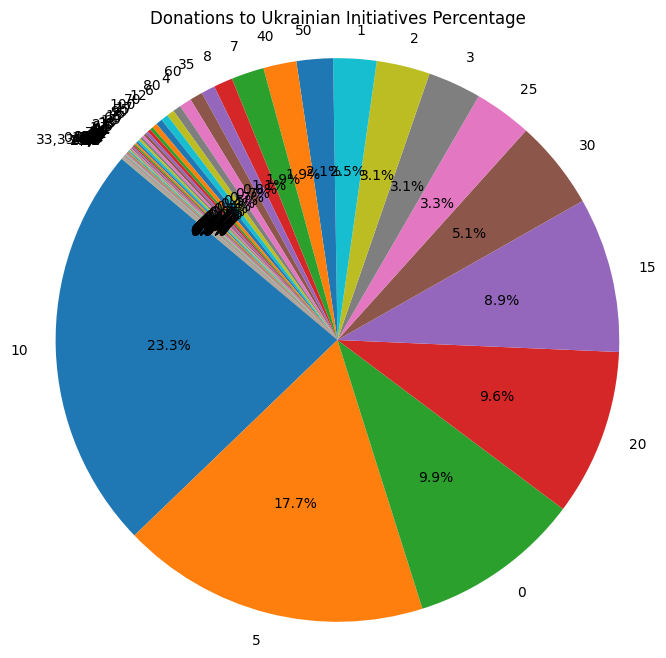

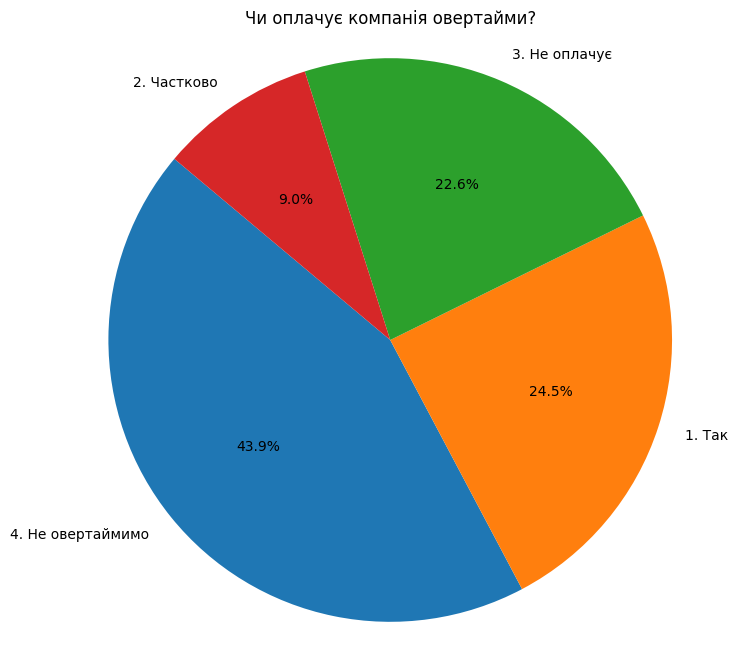

In [65]:
import matplotlib.pyplot as plt

# List of column names to create pie charts for
columns_to_plot = [
    'Чи задоволені ви зарплатою?',
    'Чи змінилася ваша зарплата через початок війни?',
    'Do you have other sources of income',
    'Яке ваше фінансове становище?',
    'Donations to Ukrainian Initiatives Percentage',
    'Чи оплачує компанія овертайми?'
]

# Create pie charts for each column
for column_name in columns_to_plot:
    column = third_question[column_name]
    labels = column.value_counts().index
    sizes = column.value_counts().values

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{column_name}')

    plt.axis('equal')
    plt.show()


Більшість айтівців (54%) швидше задоволені своїм винагородженням за роботу, 31% повністю задоволені, 14% оцінюють свою зарплату незадовільно. Це можна пояснити: після початку війни ціни на більшість товарів і послуг зросли, але в 61% айтівців зарплата не змінилась, ще у 13 відсотків зарплата або зменшилась, або її взагалі нема. Також, у абсолютної більшості (82%) немає додаткових джерел доходу. Втім, незважаючи на скоріш негативну суб'єктивну оцінку айтівцями своїх зарплат, об'єктивно ситуація непогана: 71% айтівців заробляє більше ніж витрачає.

Виведемо 5 найпопулярнішіх відсоткових значень донатів:

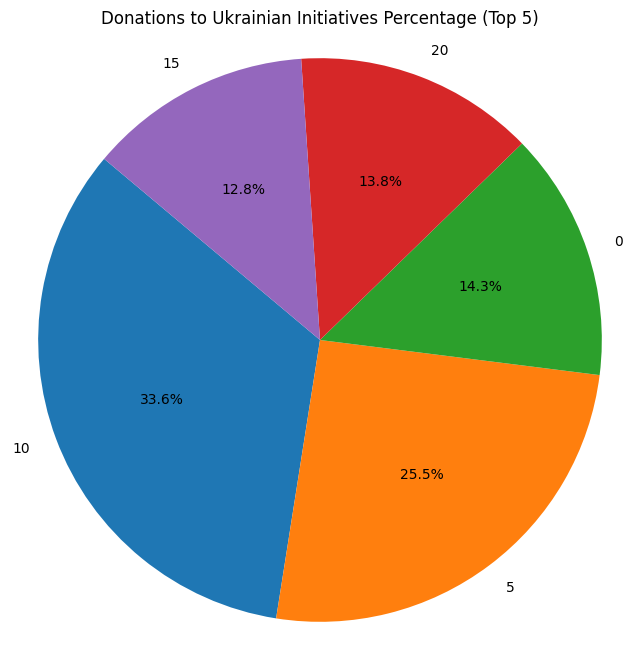

In [66]:
import matplotlib.pyplot as plt

# Select the column of interest
column_name = 'Donations to Ukrainian Initiatives Percentage'
column = third_question[column_name]

# Get the top 5 value counts
top_5 = column.value_counts().head(5)

# Create a pie chart for the top 5 values
plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title(f'{column_name} (Top 5)')

plt.axis('equal')
plt.show()


Фінансове становище айтівців непогане, більшість з них мають можливість регулярно донатити на армію 5-20% від заробітної плати

Відповідь на 4-те питання

In [85]:
fourth_question = df.iloc[:, [16,28,29,30,52,53,54]].copy()
fourth_question.head()

,Оберіть вашу посаду,Основна мова програмування,Інші мови програмування,"Платформи, для яких розробляєте на поточному місці роботи?",Які використовуєте сервіси та інструменти для спільної роботи?,Яка у вас освіта?,Знання англійської мови
0,"Software Engineer (Junior, Middle, Senior, Tea...",JavaScript,"SQL, TypeScript",Web,"GitLab, Jira, Slack, Trello","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate
1,"Designer (Graphic, UX/UI, Game, Artist, etc.)",NaN,NaN,NaN,"Confluence, Jira, Microsoft Teams, Slack",1. Середня,Upper-Intermediate
2,HTML Coder,JavaScript,"JavaScript, Python, TypeScript",Web,"GitHub, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Pre-Intermediate
3,"Software Engineer (Junior, Middle, Senior, Tea...",Go,"Go, Rust",Web,"Confluence, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Intermediate
4,"Project/Product/Program Manager, Product Owner...",NaN,NaN,NaN,"Confluence, Google Suite (Docs, Meet, etc), Ji...","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate


In [87]:
fourth_question['Оберіть вашу посаду'].value_counts()

Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)             7608
QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)                     2506
Project/Product/Program Manager, Product Owner, Scrum Master, Delivery Manager    1050
HR/Recruiter                                                                       719
Analyst (Business, Data, System)                                                   562
Designer (Graphic, UX/UI, Game, Artist, etc.)                                      504
DevOps, SRE                                                                        475
Marketing, SEO, Copywriter                                                         362
Data Science, Machine Learning, Big Data                                           315
Support                                                                            227
СTO, Director of Engineering, Program Director, CEO, (co-)founder                  169
Game Developer                             

Відфільтруємо датасет, щоб витягнути тільки аналітиків і дата саєнтистів

In [90]:
data_guys = fourth_question[(fourth_question['Оберіть вашу посаду'] == 'Analyst (Business, Data, System)') | (fourth_question['Оберіть вашу посаду'] == 'Data Science, Machine Learning, Big Data')]
data_guys

,Оберіть вашу посаду,Основна мова програмування,Інші мови програмування,"Платформи, для яких розробляєте на поточному місці роботи?",Які використовуєте сервіси та інструменти для спільної роботи?,Яка у вас освіта?,Знання англійської мови
19,"Analyst (Business, Data, System)",SQL,"Python, SQL","Web, Mobile iOS","Google Suite (Docs, Meet, etc), Asana","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate
23,"Analyst (Business, Data, System)",JavaScript,"Мови розробки БД (PL/SQL, Transact-SQL)","Web, Mobile cross-platform, Mobile other, Micr...",NaN,3. Ще студент вишу,Upper-Intermediate
24,"Data Science, Machine Learning, Big Data",Python,C++,NaN,"GitHub, Google Suite (Docs, Meet, etc), Slack","5. Вища (бакалавр, спеціаліст, магістр)",Advanced
25,"Analyst (Business, Data, System)",NaN,NaN,NaN,"Confluence, Facebook Workplace, GitHub, Jira, ...","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate
29,"Data Science, Machine Learning, Big Data",Python,"C++, Мови розробки БД (PL/SQL, Transact-SQL)","Web, Mobile cross-platform","GitHub, GitLab, Google Suite (Docs, Meet, etc)...","5. Вища (бакалавр, спеціаліст, магістр)",Advanced
...,...,...,...,...,...,...,...
15021,"Analyst (Business, Data, System)",NaN,NaN,NaN,"Confluence, Jira, Microsoft Teams","5. Вища (бакалавр, спеціаліст, магістр)",Advanced
15022,"Data Science, Machine Learning, Big Data",Scala,"Java, Python, SQL",Web,"Confluence, GitLab, Jira, Microsoft Teams",1. Середня,Intermediate
15062,"Analyst (Business, Data, System)",SQL,Python,Web,"Facebook Workplace, Jira, Trello",4. Незакінчена вища,Upper-Intermediate
15064,"Analyst (Business, Data, System)",Python,SQL,"Web, Mobile Android, Mobile iOS","Confluence, GitHub, Google Suite (Docs, Meet, ...","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate


Виведемо топ 5 значень по кожному зі стовпчиків

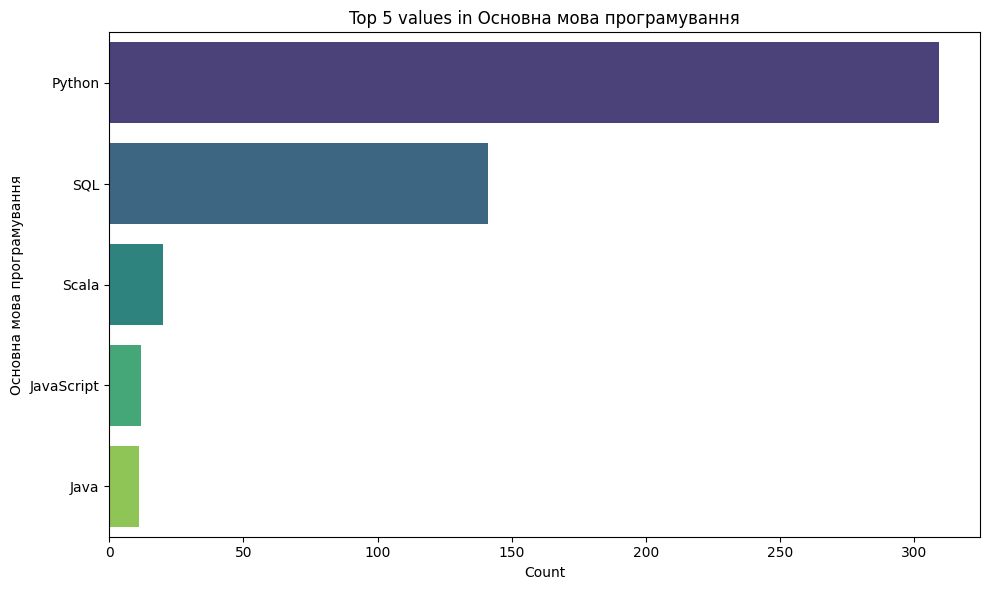

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for which you want to create a histogram
column_name = 'Основна мова програмування'

# Get the value counts for the selected column
value_counts = data_guys[column_name].value_counts().head(5)

# Create a bar plot for the top values
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel(column_name)
plt.title(f'Top 5 values in {column_name}')

# Display the plot
plt.tight_layout()
plt.show()


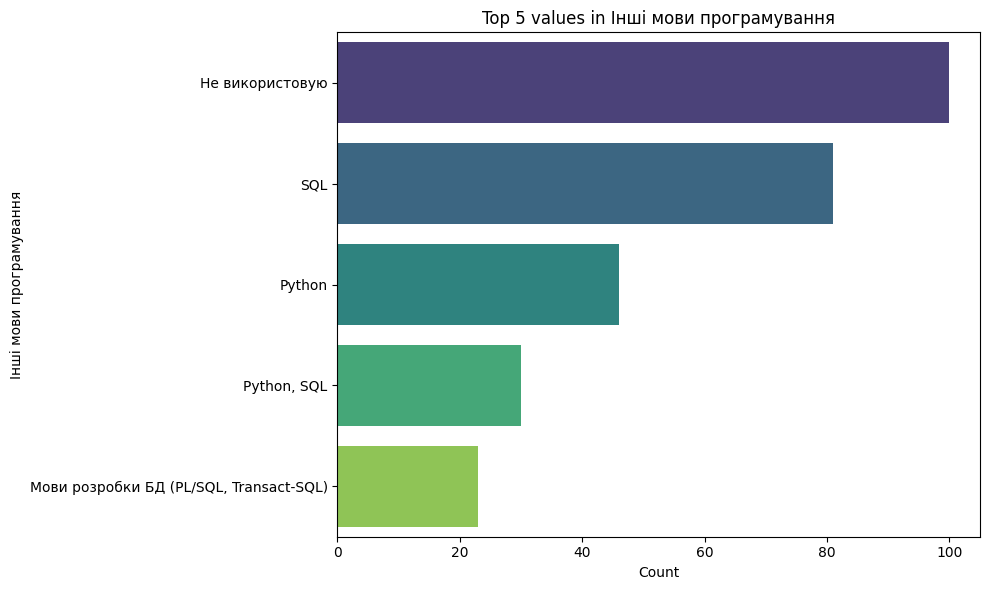

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for which you want to create a histogram
column_name = 'Інші мови програмування'

# Get the value counts for the selected column
value_counts = data_guys[column_name].value_counts().head(5)

# Create a bar plot for the top values
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel(column_name)
plt.title(f'Top 5 values in {column_name}')

# Display the plot
plt.tight_layout()
plt.show()

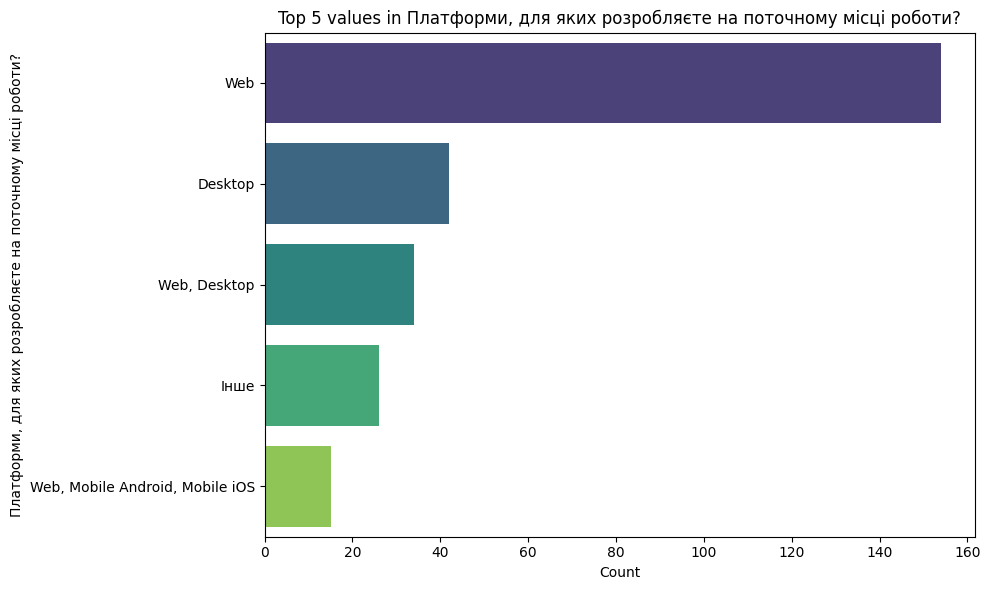

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for which you want to create a histogram
column_name = 'Платформи, для яких розробляєте на поточному місці роботи?'

# Get the value counts for the selected column
value_counts = data_guys[column_name].value_counts().head(5)

# Create a bar plot for the top values
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel(column_name)
plt.title(f'Top 5 values in {column_name}')

# Display the plot
plt.tight_layout()
plt.show()

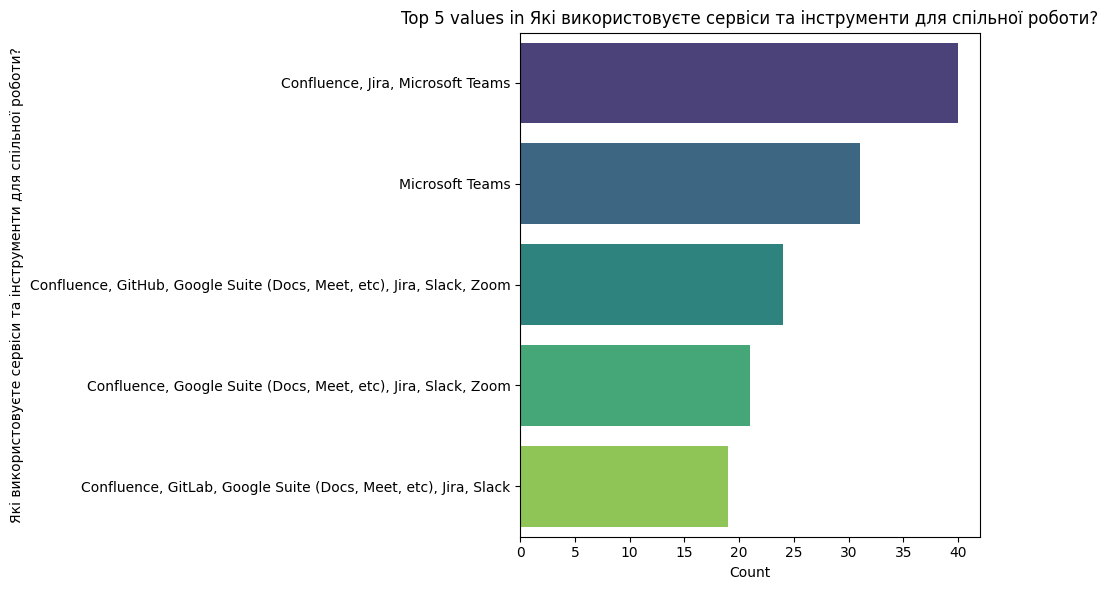

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for which you want to create a histogram
column_name = 'Які використовуєте сервіси та інструменти для спільної роботи?'

# Get the value counts for the selected column
value_counts = data_guys[column_name].value_counts().head(5)

# Create a bar plot for the top values
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel(column_name)
plt.title(f'Top 5 values in {column_name}')

# Display the plot
plt.tight_layout()
plt.show()

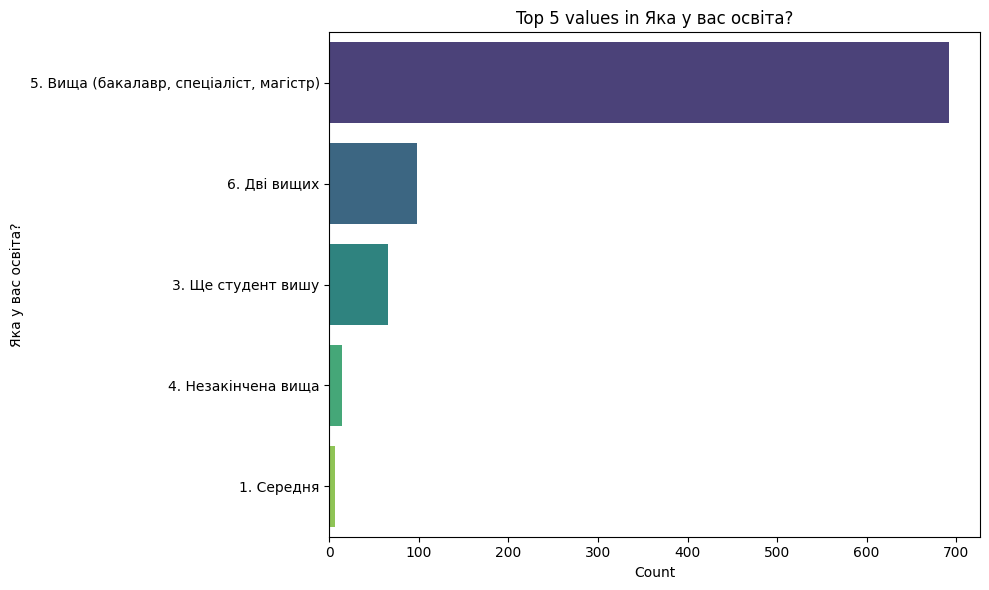

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for which you want to create a histogram
column_name = 'Яка у вас освіта?'

# Get the value counts for the selected column
value_counts = data_guys[column_name].value_counts().head(5)

# Create a bar plot for the top values
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel(column_name)
plt.title(f'Top 5 values in {column_name}')

# Display the plot
plt.tight_layout()
plt.show()

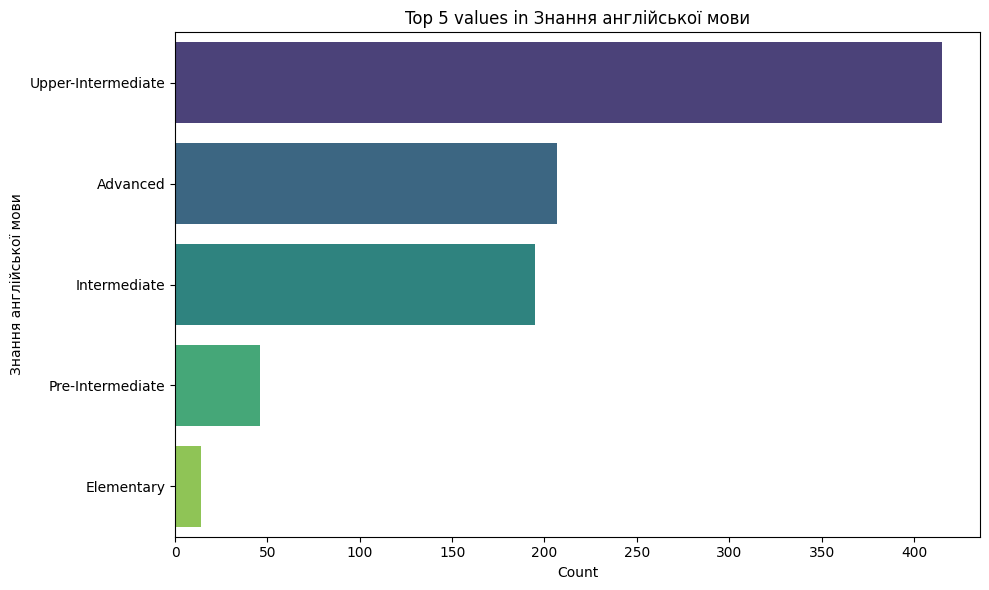

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the column for which you want to create a histogram
column_name = 'Знання англійської мови'

# Get the value counts for the selected column
value_counts = data_guys[column_name].value_counts().head(5)

# Create a bar plot for the top values
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel(column_name)
plt.title(f'Top 5 values in {column_name}')

# Display the plot
plt.tight_layout()
plt.show()

Найбільше дата аналітики і дата саєнтисти використовують мови Python, SQL, Scala, Javascript i Java, а також мови розробки бази даних.

Найбільш часте застосування в них мають веб та десктоп платформи.

Для спільної роботи найчастіше використовується Confluence, Jira, MS Teams

Найчастіше серед дата аналітиків або дата саєнтистів зустрічаються люди з вищою освітою, або двома, або ті, хто її здобуває.

Вони також мають середній - просунутий ріень англійської мови



